In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

<Axes: >

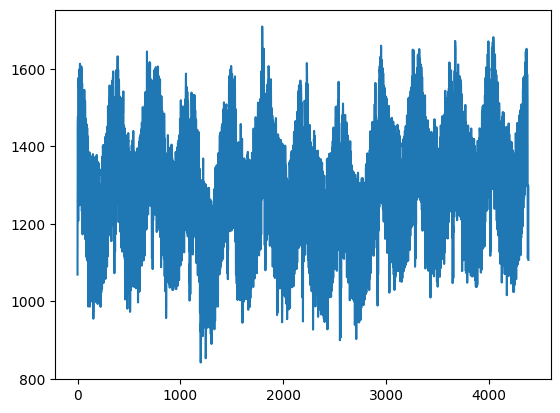

In [ ]:
df=pd.read_csv("/content/opsd_germany_daily.csv")
df['Consumption'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
df_StationaryTest= adfuller(df['Consumption'],autolag='AIC')
print("P-value: ", df_StationaryTest[1])

P-value:  4.7440549018425884e-08


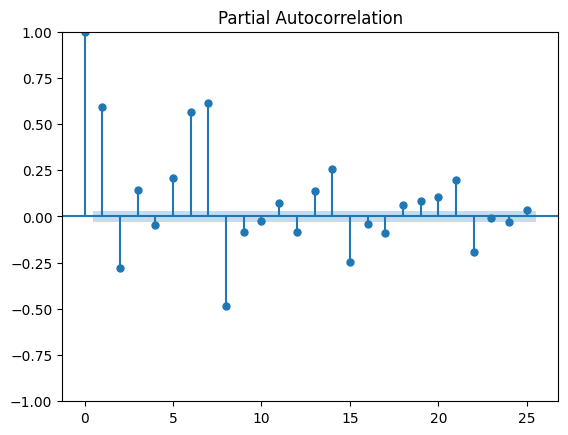

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf= plot_pacf(df['Consumption'],lags=25)

In [ ]:
train_data=df['Consumption'][:len(df)-100]
test_data=df['Consumption'][len(df)-100:]
ar_model=AutoReg(train_data,lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Thu, 08 Feb 2024   AIC                          48483.625
Time:                        07:59:21   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

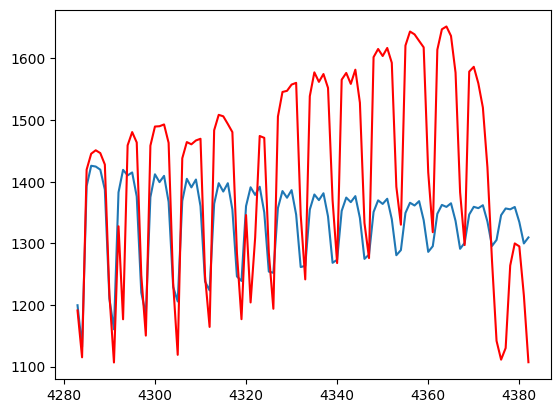

In [ ]:
pred=ar_model.predict(start=len(train_data),end=(len(df)-1),dynamic=False)
plt.plot(pred)
plt.plot(test_data,color='red')